In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/socio-demographic-influences-on-student-grades/student-mat.csv


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Distributions
import scipy

In [56]:
df=pd.read_csv('/kaggle/input/socio-demographic-influences-on-student-grades/student-mat.csv')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No missing values in the data set

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [12]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [13]:
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


## Students Age

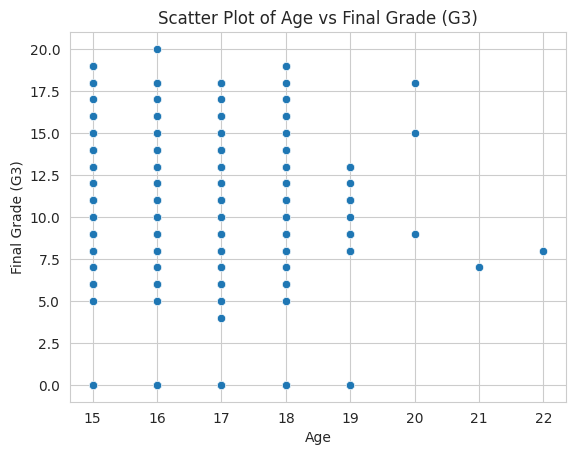

In [57]:
sns.scatterplot(x='age', y='G3', data=df)
plt.title('Scatter Plot of Age vs Final Grade (G3)')
plt.xlabel('Age')
plt.ylabel('Final Grade (G3)')
plt.show()

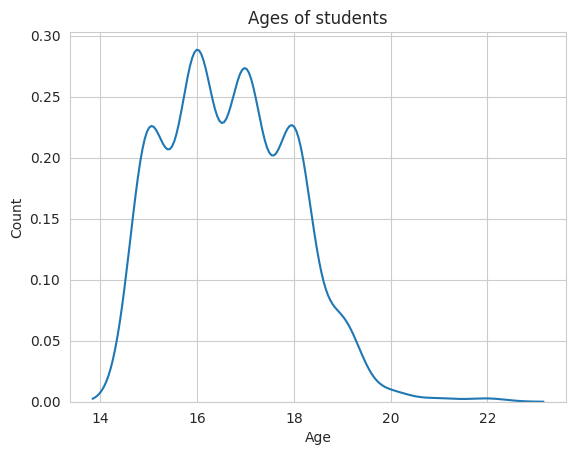

In [58]:
t = sns.kdeplot(df['age'])    # Kernel Density Estimations
t.axes.set_title('Ages of students')
t.set_xlabel('Age')
t.set_ylabel('Count')
plt.show()

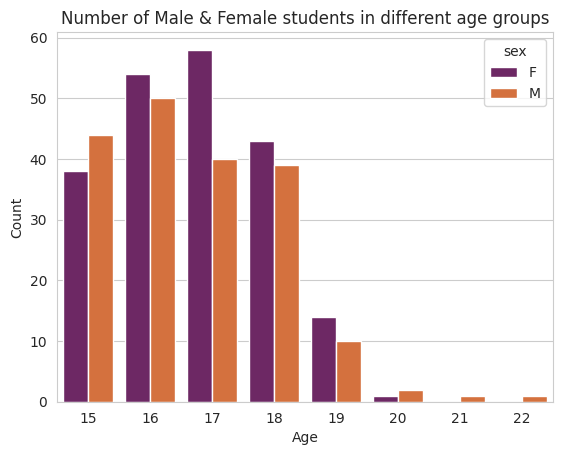

In [59]:
b = sns.countplot(x='age',hue='sex', data=df, palette='inferno')
b.axes.set_title('Number of Male & Female students in different age groups')
b.set_xlabel("Age")
b.set_ylabel("Count")
plt.show()

The student age seems to be ranging from 15-19, where gender distribution is pretty even in each age group.
The age group above 19 may be outliers, year back students or droupouts.

## Students from Urban & Rural Areas

In [20]:
df['address'].value_counts()

address
U    307
R     88
Name: count, dtype: int64

U represents Urban and R represents Rural.

<Axes: xlabel='address', ylabel='count'>

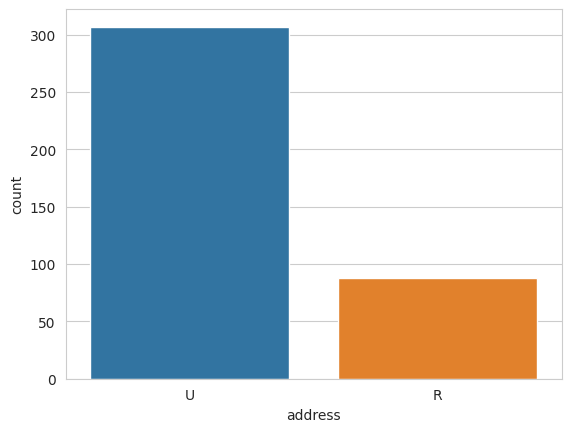

In [60]:
sns.countplot(x='address',data=df) 

Approximately 77.72% students come from urban region and 22.28% from rural region.

## Students Sex

<Axes: xlabel='sex', ylabel='count'>

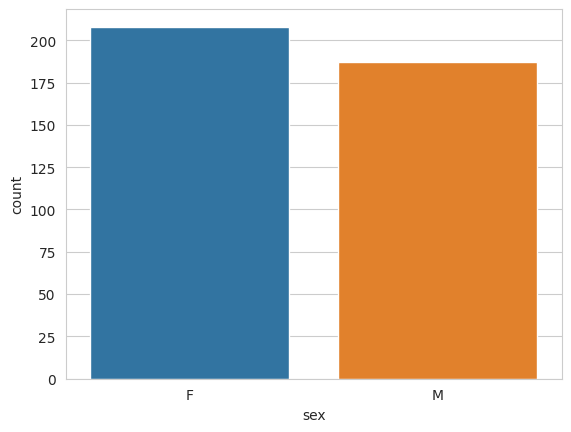

In [61]:
sns.set_style('whitegrid')    # male & female student representaion on countplot
sns.countplot(x='sex',data=df)

The gender distribution is pretty even.

# EDA - Exploratory Data Analysis

## 1. Does age affect final grade?

Text(0.5, 1.0, 'Age vs Final Grade')

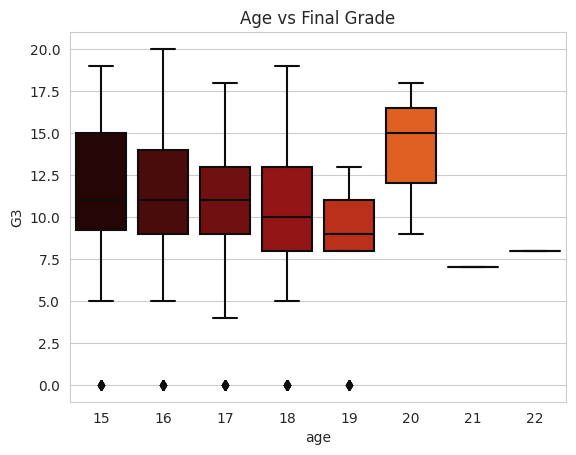

In [62]:
b= sns.boxplot(x='age', y='G3',data=df,palette='gist_heat')
b.axes.set_title('Age vs Final Grade')

**• Observation** - The above plot shows that the median grades of the three age groups(15,16,17) are similar. Note the skewness of age group 19. (may be due to sample size). Age group 20 seems to score highest grades among all.

## 2. Do urban students perform better than rural students?

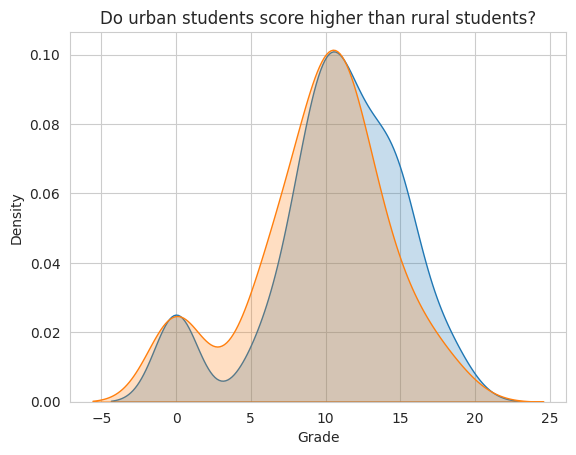

In [63]:
# Grade distribution by address
sns.kdeplot(df.loc[df['address'] == 'U', 'G3'], label='Urban', shade = True)
sns.kdeplot(df.loc[df['address'] == 'R', 'G3'], label='Rural', shade = True)
plt.title('Do urban students score higher than rural students?')
plt.xlabel('Grade');
plt.ylabel('Density')
plt.show()

**• Observation** - The above graph clearly shows there is not much difference between the grades based on location.

## 3. Does the number of past class failures affect the final grade?

Text(0.5, 1.0, 'Previous Failures vs Final Grade(G3)')

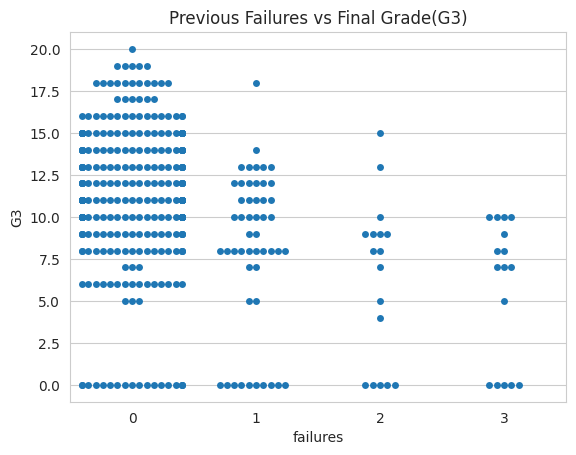

In [64]:
b = sns.swarmplot(x=df['failures'],y=df['G3'])
b.axes.set_title('Previous Failures vs Final Grade(G3)')

**• Observation** - Student with less previous failures usually score higher

## 4. Does the combined education level of the parents affect the final grade?

Text(0.5, 1.0, 'Family Education vs Final Grade(G3)')

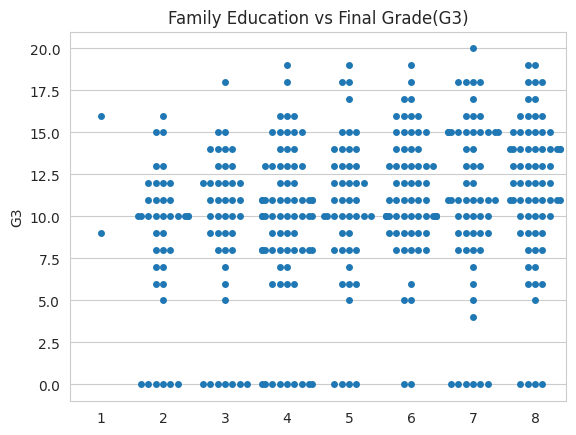

In [65]:
fa_edu = df['Fedu'] + df['Medu']
b = sns.swarmplot(x=fa_edu,y=df['G3'])
b.axes.set_title('Family Education vs Final Grade(G3)')

**• Observation** - Educated families result in higher grades

## 5. Does the desire to pursue higher education influence the final grade?

Text(0.5, 1.0, 'Higher Education vs Final Grade(G3)')

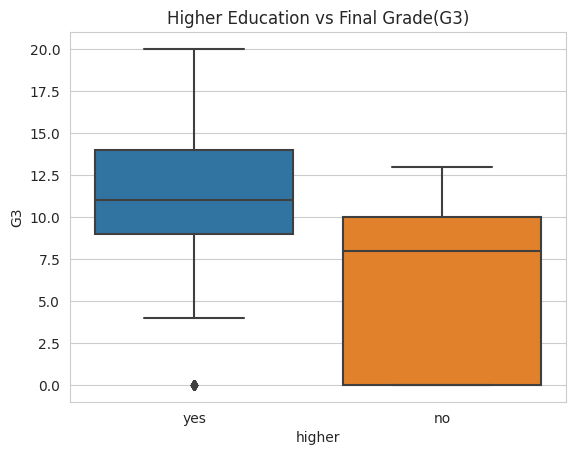

In [66]:
b = sns.boxplot(x=df['higher'],y=df['G3'])
b.axes.set_title('Higher Education vs Final Grade(G3)')

**• Observation** - Students who wish to go for higher studies score more

## 6. Does the frequency of going out with friends affect the final grade?

Text(0.5, 1.0, 'Go Out vs Final Grade(G3)')

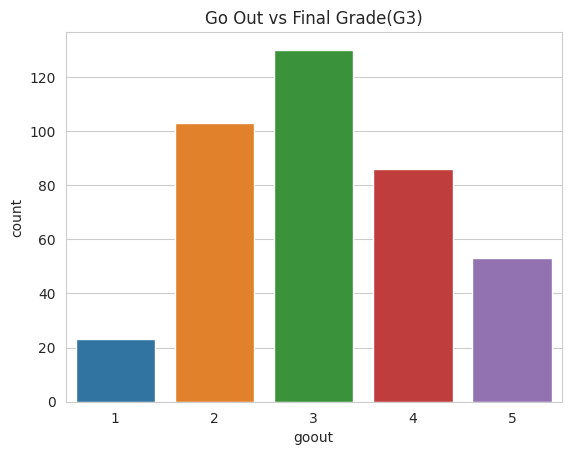

In [67]:
b = sns.countplot(x=df['goout'])
b.axes.set_title('Go Out vs Final Grade(G3)')

**• Observation** - The students have an average score when it comes to going out with friends.

## 7. Does having a romantic relationship affect the final grade?

Text(0.5, 1.0, 'Romantic Relationship vs Final Grade(G3)')

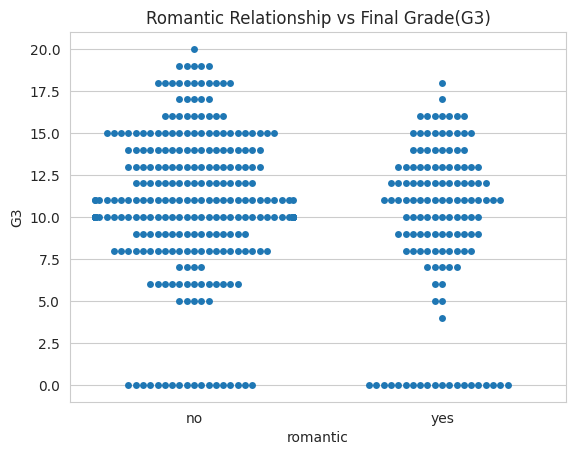

In [68]:
b = sns.swarmplot(x=df['romantic'],y=df['G3'])
b.axes.set_title('Romantic Relationship vs Final Grade(G3)')

**• Observation** - Students with no romantic relationship score higher

## 8. Does the reason for choosing this school affect the final grade?

Text(0.5, 1.0, 'Reason vs Students Count')

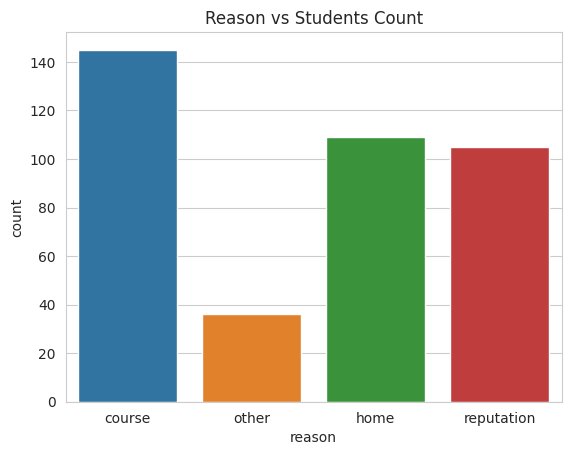

In [69]:
b = sns.countplot(x='reason',data=df)    # Reason to choose this school
b.axes.set_title('Reason vs Students Count')

Text(0.5, 1.0, 'Reason vs Final grade')

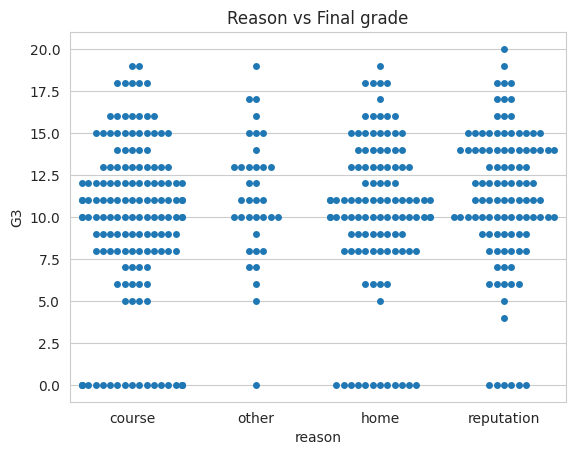

In [70]:
b = sns.swarmplot(x='reason', y='G3', data=df)
b.axes.set_title('Reason vs Final grade')

**• Observation** - The students have an equally distributed average score when it comes to reason attribute.

## 9. Does gender influence the grades?

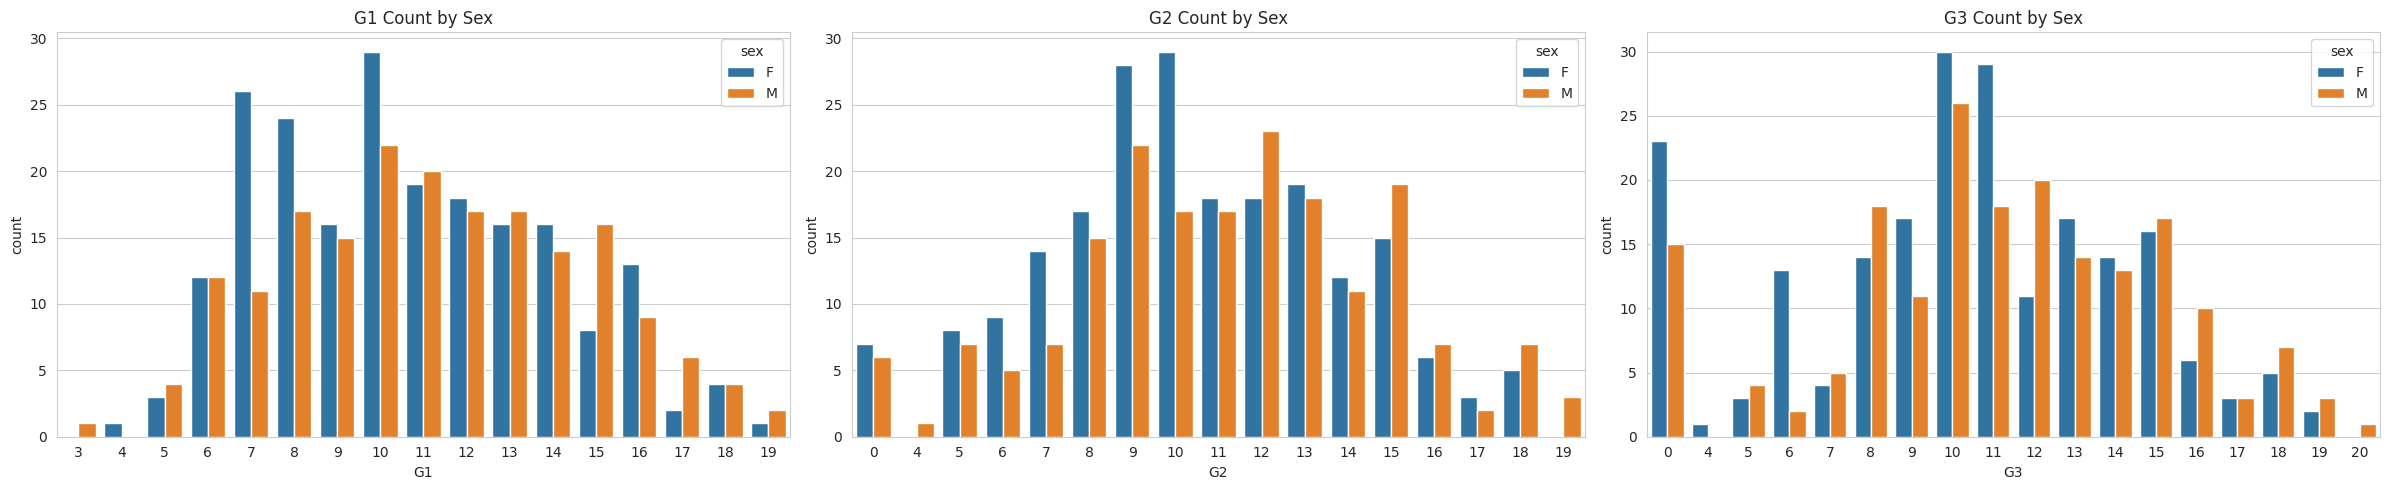

In [71]:
fig, axesarr = plt.subplots(1, 3, figsize=(24, 5))

sns.countplot(x='G1', hue='sex', data=df, ax=axesarr[0])
axesarr[0].set_title('G1 Count by Sex')

sns.countplot(x='G2', hue='sex', data=df, ax=axesarr[1])
axesarr[1].set_title('G2 Count by Sex')

sns.countplot(x='G3', hue='sex', data=df, ax=axesarr[2])
axesarr[2].set_title('G3 Count by Sex')

plt.tight_layout()
plt.show()

## 10. Do the number of absences affect the final grade?

Text(0.5, 1.0, 'Absence vs Final Grade(G3)')

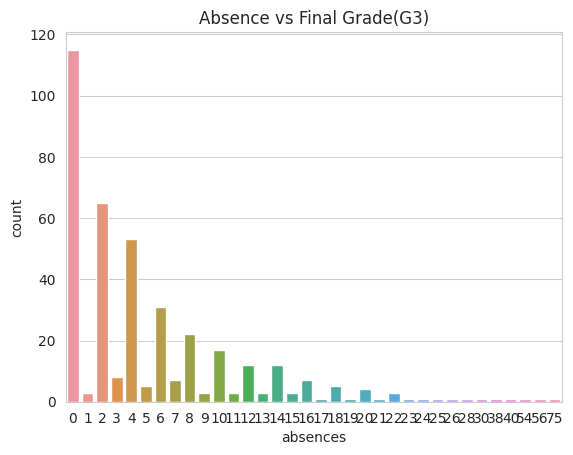

In [72]:
b = sns.countplot(x=df['absences'])
b.axes.set_title('Absence vs Final Grade(G3)')

**• Observation** - Student with less count of absences, score higher.

# Correlation with the Target Variable - Final Grade

In [73]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [74]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Renaming standardized columns with 'z_' prefix
df.rename(columns={col: 'z_' + col for col in numeric_cols}, inplace=True)

In [75]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True, dtype=int)

In [76]:
df

,z_age,z_Medu,z_Fedu,z_traveltime,z_studytime,z_failures,z_famrel,z_freetime,z_goout,z_Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,1,0,1,0,0,0,1,1,0,0
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,0,0,0,1,0,0,0,1,1,0
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,1,0,1,0,1,0,1,1,1,0
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,1,0,0,1,1,1,1,1,1,1
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,0,0,0,1,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,...,0,1,0,1,1,0,1,1,0,0
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,-2.171138,0.766399,1.700867,1.707469,...,1,0,0,0,0,0,0,1,1,0
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.178860,1.768808,-0.097908,1.707469,...,0,1,0,0,0,0,0,1,0,0
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.062194,0.766399,-1.896683,1.707469,...,1,0,0,0,0,0,0,1,1,0


In [77]:
correlation_matrix = df.corr()

# Extract the correlation with the target variable (G3)
correlation_with_target = correlation_matrix['z_G3'].sort_values(ascending=False)

print("Correlation with the target variable (G3):")
print(correlation_with_target)

Correlation with the target variable (G3):
z_G3                 1.000000
z_G2                 0.904868
z_G1                 0.801468
z_Medu               0.217147
higher_yes           0.182465
z_Fedu               0.152457
Mjob_health          0.116158
address_U            0.105756
sex_M                0.103456
paid_yes             0.101996
internet_yes         0.098483
z_studytime          0.097820
reason_reputation    0.095692
Fjob_teacher         0.095374
famsize_LE3          0.081407
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_health          0.057111
reason_other         0.052008
nursery_yes          0.051568
z_famrel             0.051363
z_absences           0.034247
guardian_mother      0.022338
activities_yes       0.016100
z_freetime           0.011307
Fjob_services       -0.016108
reason_home         -0.021359
famsup_yes          -0.039157
school_MS           -0.045017
z_Walc              -0.051939
Fjob_other          -0.053483
z_Dalc              -0.0546

In [82]:
df=df.drop(['z_G1','z_G2'], axis=1)

Although G1 and G2 which are period grades of a student and are highly correlated to the final grade G3, we drop them. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful because we want to find other factors affect the grade.

# Find Feature Importances

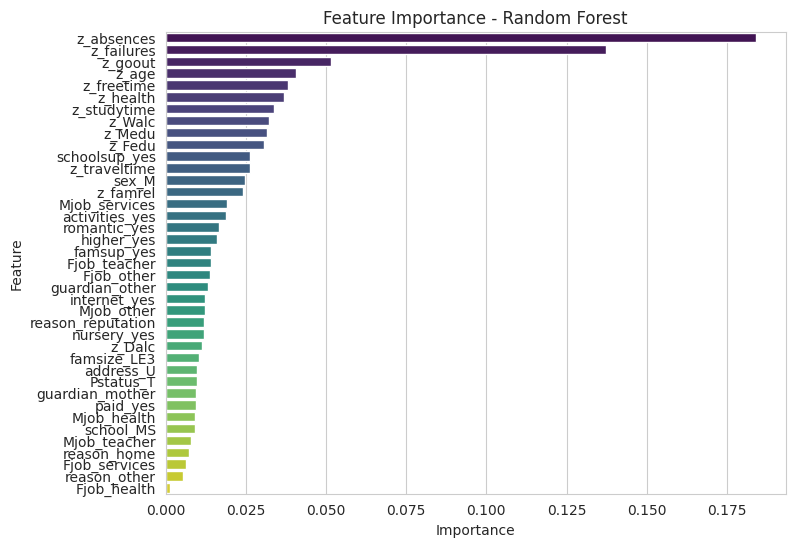

In [83]:
target = df['z_G3']

rf = RandomForestRegressor(random_state=42)
rf.fit(df.drop('z_G3', axis=1), target)

feature_importances_rf = rf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': df.drop('z_G3', axis=1).columns,
    'Importance': feature_importances_rf
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

**• Key observations are:**

1. **Absences**: This is the most important feature, indicating that the number of absences significantly impacts student grades.
2. **Failures**: The number of past class failures is also highly important, suggesting a strong correlation with current academic performance.
3. **Gout (Guardian's Outing Time)**: This feature has considerable importance, implying that the amount of time guardians spend on outings with their wards affects students' academic outcomes.
4. **Age**: Student's age is a notable factor, with older students possibly having different academic performance trends.
5. **Free Time**: The amount of free time students have is relevant, potentially impacting their study habits and grades.
6. **Health**: Student health is an important factor, possibly influencing attendance and ability to perform academically.

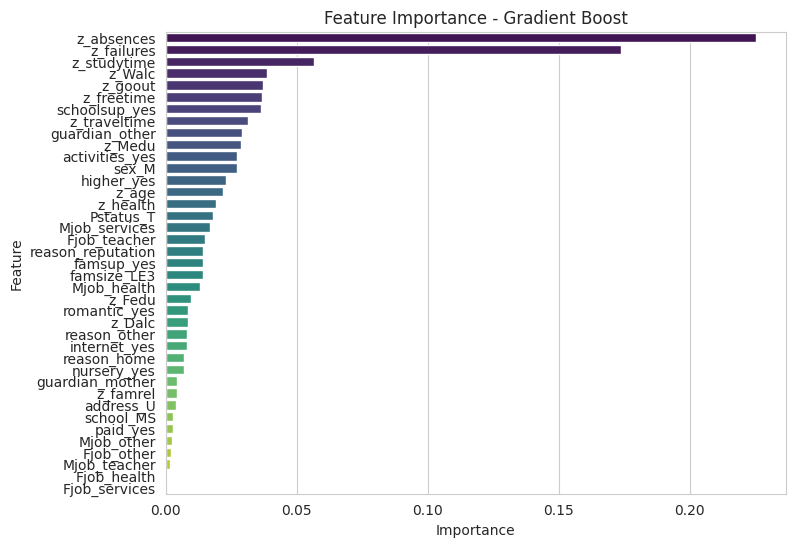

In [84]:
target = df['z_G3']

gb = GradientBoostingRegressor(random_state=42)
gb.fit(df.drop('z_G3', axis=1), target)

feature_importances_gb = gb.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({
    'Feature': df.drop('z_G3', axis=1).columns,
    'Importance': feature_importances_gb
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Gradient Boost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Let's select the important features which affect the Final Grade of a student for the model training part.

**Selected features : z_absences, z_failures, z_studytime, z_Walk, z_goout, z_freetime, z_age, z_health** 

In [94]:
df = df[['z_absences', 'z_failures', 'z_studytime', 'z_Walc', 'z_goout', 'z_freetime', 'z_age', 'z_G3']]

In [95]:
X = df.drop('z_G3', axis=1)  
y = df['z_G3']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.80
R^2 Score: 0.19


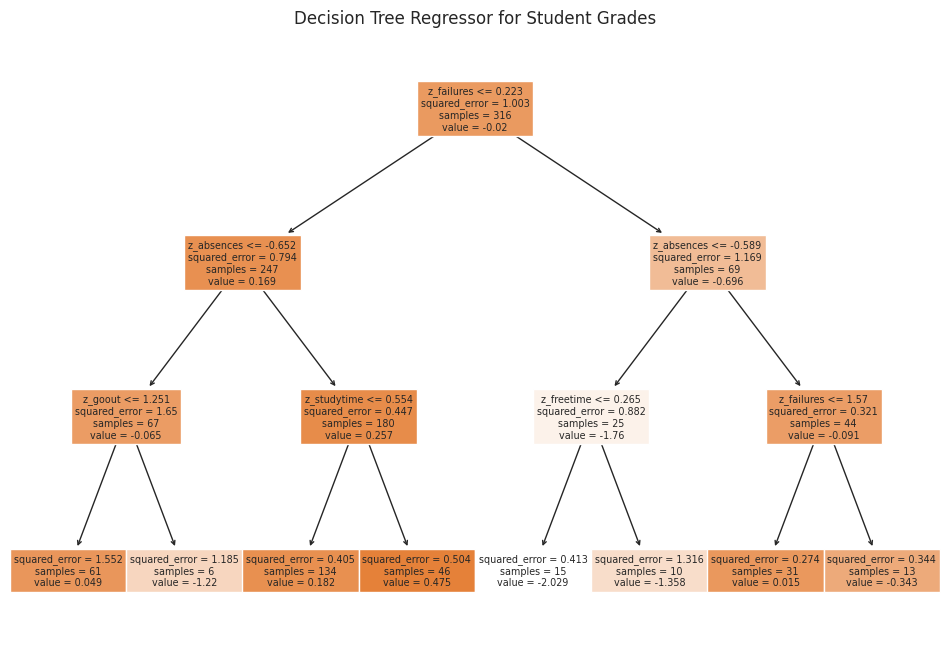

In [96]:
regressor = DecisionTreeRegressor(max_depth=3, random_state=42)

# Fit the regressor to the training data
regressor.fit(X_train, y_train)

# Predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.title("Decision Tree Regressor for Student Grades")
plt.show()

# Machine Learning Algorithms

In [97]:
X_train.head()

,z_absences,z_failures,z_studytime,z_Walc,z_goout,z_freetime,z_age
181,-0.464016,-0.449944,-0.042286,-0.226345,-0.097908,-1.238419,-0.546287
194,-0.714236,-0.449944,-1.235351,-1.003789,-0.097908,-0.236010,-0.546287
173,-0.714236,3.589323,-0.042286,-1.003789,1.700867,-0.236010,-0.546287
63,-0.464016,-0.449944,1.150779,1.328545,0.801479,0.766399,-0.546287
253,-0.714236,-0.449944,-1.235351,0.551100,-0.997295,-0.236010,-0.546287


In [98]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [102]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=100)
    model4 = ExtraTreesRegressor(n_estimators=100)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=50)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [103]:
results = evaluate(X_train, X_test, y_train, y_test)
results

,mae,rmse
Linear Regression,0.757189,0.944883
ElasticNet Regression,0.796796,0.994436
Random Forest,0.71177,0.904108
Extra Trees,0.726029,0.923482
SVM,0.695063,0.87953
Gradient Boosted,0.715941,0.913064
Baseline,0.791202,0.990895


**Conclusion: As we see both Model Mean Absolute Error & Model Root Mean Squared Error that the Support Vector Machine is performing the best in both cases**